In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random


In [19]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [20]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.795204,0.776769,1.556234,-1.349762,1.386525,1
1,2.813921,1.287563,0.800303,-2.239688,1.004442,1
2,-2.894390,3.181216,0.027799,-2.529620,-1.343929,0
3,-2.501788,2.571152,0.402168,-2.094891,0.113323,0
4,0.633044,-0.555648,0.745544,-0.175316,-1.267889,0


In [21]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [22]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [23]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [24]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_2956\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [25]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_2956\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [26]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_2956\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [27]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col1', 'target'], dtype='object')
Index(['col1', 'col4', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')


In [28]:
df3

,col1,col5,target
14,0.347178,-0.385660,0
10,1.477848,-0.777471,0
93,-0.969099,0.750122,0
18,-0.598914,0.348511,0
32,1.046291,0.120281,1
25,-0.521931,0.647327,1
21,-1.385937,-0.940628,0
68,-0.206888,-0.690915,0
71,-0.702747,-0.982760,0
33,-0.825305,0.330346,1


In [29]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [30]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [31]:
from sklearn.tree import plot_tree

[Text(0.4444444444444444, 0.9166666666666666, 'x[1] <= -0.035\ngini = 0.471\nsamples = 50\nvalue = [19, 31]'),
 Text(0.2222222222222222, 0.75, 'x[0] <= -2.829\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(0.1111111111111111, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[0] <= 0.929\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[1] <= -0.239\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.3333333333333333, 0.25, 'x[0] <= -0.037\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.75, 'x[0] <= 0

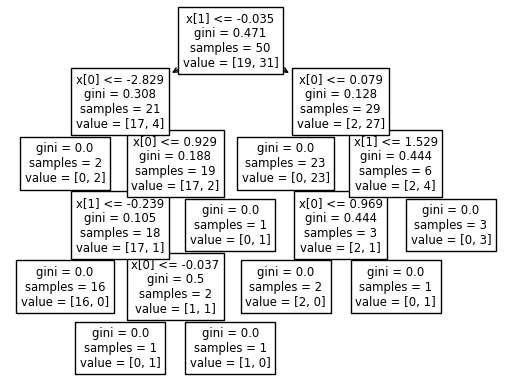

In [32]:
plot_tree(clf1)

[Text(0.5555555555555556, 0.9166666666666666, 'x[0] <= -0.009\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.3333333333333333, 0.75, 'x[1] <= 0.643\ngini = 0.269\nsamples = 25\nvalue = [21, 4]'),
 Text(0.2222222222222222, 0.5833333333333334, 'x[1] <= -2.689\ngini = 0.159\nsamples = 23\nvalue = [21, 2]'),
 Text(0.1111111111111111, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[0] <= -0.416\ngini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.2222222222222222, 0.25, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.4444444444444444, 0.25, 'x[1] <= -1.067\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5555555555555556, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.4444444444444444, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.75, 'x[1] <=

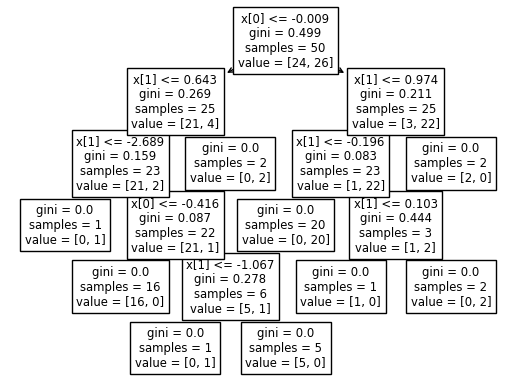

In [33]:
plot_tree(clf2)

[Text(0.5333333333333333, 0.9166666666666666, 'x[1] <= 0.557\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.3333333333333333, 0.75, 'x[0] <= -0.17\ngini = 0.346\nsamples = 27\nvalue = [21, 6]'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[1] <= 0.32\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.06666666666666667, 0.4166666666666667, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.2, 0.4166666666666667, 'x[1] <= 0.339\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.13333333333333333, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.26666666666666666, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5333333333333333, 0.5833333333333334, 'x[1] <= 0.165\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.4666666666666667, 0.4166666666666667, 'x[1] <= -0.267\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.4, 0.25, 'x[0] <= 1.524\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\

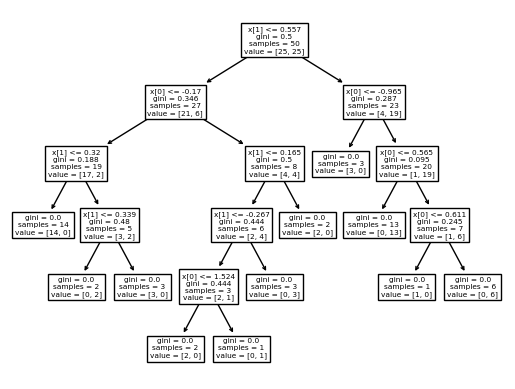

In [34]:
plot_tree(clf3)

In [35]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [36]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [37]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [38]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
50,0.234850,0.600815,0.884261,-1.497603,-0.543941,1
24,-2.021975,3.777833,0.421968,-1.870276,-2.800600,0
2,-2.894390,3.181216,0.027799,-2.529620,-1.343929,0
18,-0.598914,0.557701,2.134508,0.097125,0.348511,0
71,-0.702747,0.901239,2.010012,-0.366230,-0.982760,0
20,-0.527708,1.047943,0.953451,-0.677005,-1.460349,0
13,0.542025,1.375158,1.247294,-0.249494,1.593918,1
63,2.176025,2.691975,0.353033,-0.483561,1.568720,1
6,-1.327852,2.293614,-0.245955,-1.840099,-2.399414,0
3,-2.501788,2.571152,0.402168,-2.094891,0.113323,0
